# Calibration

In [3]:
%load_ext autoreload
%autoreload 2
import os
os.environ["NUMBA_PARFOR_MAX_TUPLE_SIZE"] = "200" # Need to increase tupple size for Numba to work 
import sys 
sys.path.insert(0, './Main')
sys.path.insert(0, './Main/saved')
import numpy as np
execfile("figsettings.py") # Work for now, but bad practice 
 
from IHANKModel import HANKModelClass
import utils
import figs
import numba as nb 
nb.set_num_threads(4)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Find steady states of HANK and RANK models

In [4]:
model_HA = HANKModelClass(name='baseline')
model_HA.par.HH_type = 'HA'
model_HA.find_ss(do_print=False)

model_RA = model_HA.copy()
model_RA.par.HH_type = 'RA-IM'
model_RA.find_ss(do_print=False)

Calculate and plot responses to income shock (iMPCs) and real interest rate shock in PE

<Figure size 440x580 with 0 Axes>

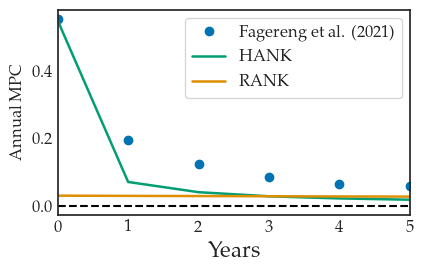

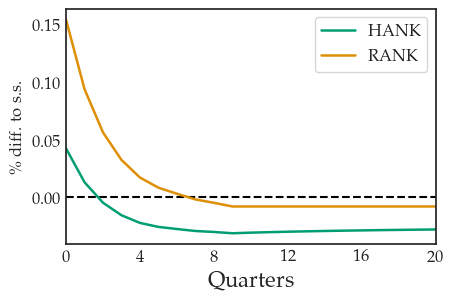

In [6]:
MPC_fig = figs.plot_MPCs(model_HA, lin=False, show_all=False, do_ann_mpc=True) 
MPC_fig.savefig(f'plots\calibration\MPCs_ann.pdf')

dC_dr_fig = figs.PE_MonPol_shock(model_HA, lin=False)
dC_dr_fig.savefig(f'plots\calibration\Rshock.pdf')

Plot columns of Jacobians across the two models 

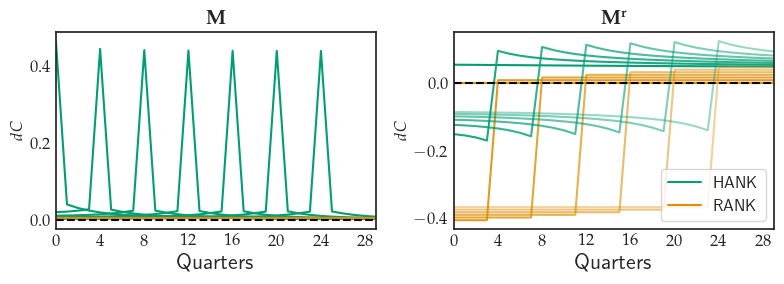

In [10]:
fig_jac_columns = figs.plot_jac_columns(model_RA, model_HA)
fig_jac_columns.savefig(f'plots\calibration\M_columns.pdf')